In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('../Datasets/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df['left'].value_counts()
#df['left'].value_counts(normalize=True) * 100

left
0    11428
1     3571
Name: count, dtype: int64

How to apply group by for features

If feature is numeric:

→ Group by target
→ Compare feature values between classes

If feature is categorical/binary:

→ Group by feature
→ Compute mean of target (leaving rate)

In [6]:
df.groupby('left')['satisfaction_level'].mean() #numeric here

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [7]:
#since salary is categorical 
pd.crosstab(df.salary, df.left)
pd.crosstab(df.salary, df.left, normalize='index') * 100

left,0,1
salary,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [8]:
df.groupby('promotion_last_5years')['left'].mean() #promotion is binary so grouped by it 

promotion_last_5years
0    0.241962
1    0.059561
Name: left, dtype: float64

In [9]:
# Among people who stayed, what fraction had accidents?
# Among people who left, what fraction had accidents?
df.groupby('left')['Work_accident'].mean() #we don't use it

left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64

In [10]:
#  Among people who had accident, what fraction left?
#  Among people who didn’t have accident, what fraction left?
df.groupby('Work_accident')['left'].mean() #we should check like this 

Work_accident
0    0.265160
1    0.077916
Name: left, dtype: float64

In [11]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

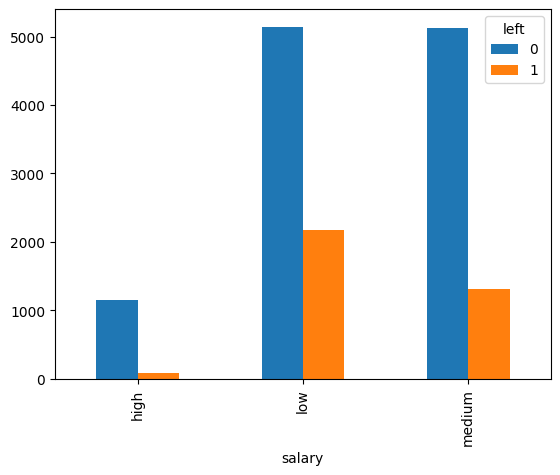

In [12]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

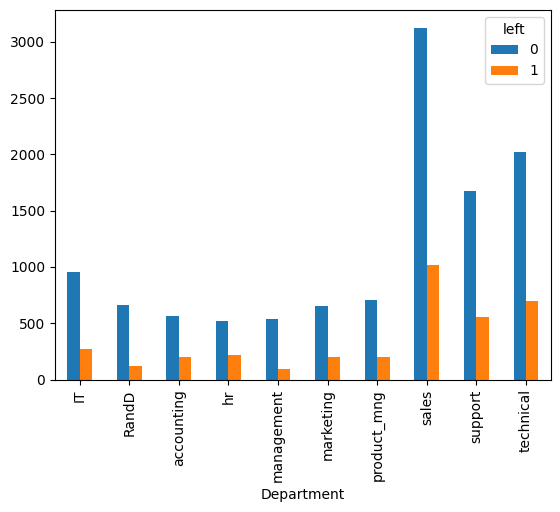

In [13]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [14]:
train_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
train_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [23]:
salary_dummies = pd.get_dummies(train_df.salary, prefix='salary', drop_first=True)
salary_dummies
df_with_dummies = pd.concat([train_df, salary_dummies], axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_low,salary_medium
0,0.38,157,0,low,True,False
1,0.80,262,0,medium,False,True
2,0.11,272,0,medium,False,True
3,0.72,223,0,low,True,False
4,0.37,159,0,low,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,low,True,False
14995,0.37,160,0,low,True,False
14996,0.37,143,0,low,True,False
14997,0.11,280,0,low,True,False


In [ ]:
#df_with_dummies.drop('salary',axis='columns',inplace=True)
X=df_with_dummies
X.head()
y = df['left']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [33]:
model=LogisticRegression()
model.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [35]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)
# model.predict([[0,100,0,False,False,True]])

0.7706666666666667

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2119,  147],
       [ 541,  193]])

Text(50.722222222222214, 0.5, 'Truth')

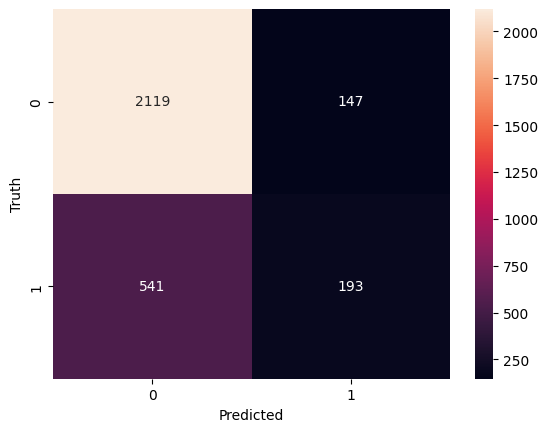

In [46]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

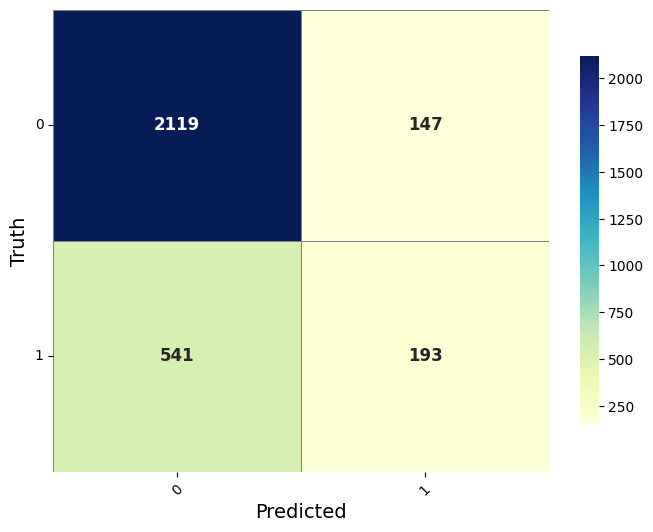

In [47]:
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
           linewidths=0.5, linecolor='gray',
           annot_kws={"size":12, "weight":"bold"},
           cbar_kws={"shrink":0.8})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Truth', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
